<a href="https://colab.research.google.com/github/Fadhal1/ejaztech.ai-project/blob/main/BANK_LOAN_APPROVAL_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

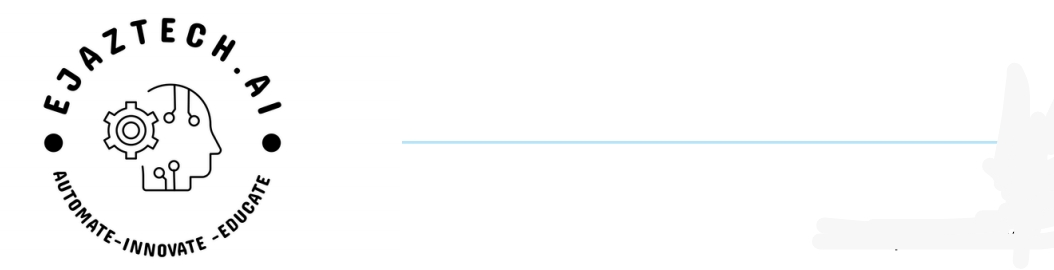

# EJAZTECH.AI FROM ZERO TO HERO PHASE 4 PROJECT SUBMISSION BY SANI FIDDALA MUHAMMAD
PROJECT NO.4

In [1]:
# Installation
!pip install pandas==2.1.4
!pip install scikit-learn==1.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 130.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [35]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('bankloan.csv')
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [60]:
#dropping unnecessary column
df_processed = df.drop(['ID', 'ZIP.Code'], axis=1)
display(df_processed.head())

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [38]:
#checking null value
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP.Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal.Loan,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Model Training

In [62]:
# Split data into features (X) and target (y)
X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [41]:
X

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [63]:
y

,Personal.Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
print(X_train.shape)
print(y_train.shape)

(4000, 13)
(4000,)


In [67]:
X_train

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
4227,4228,32,7,111,90277,1,3.8,1,0,1,0,0,0
4676,4677,39,13,68,91950,3,2.1,1,0,1,0,1,0
800,801,31,7,173,91040,1,6.0,1,0,0,0,1,0
3671,3672,50,25,18,93106,1,0.4,3,0,0,0,1,0
4193,4194,62,37,31,95008,3,0.2,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,4427,33,8,140,95814,1,4.6,1,0,0,0,1,0
466,467,25,0,13,91342,2,0.9,3,0,0,0,1,0
3092,3093,43,18,113,90036,2,0.4,1,325,1,0,0,0
3772,3773,35,10,152,94112,2,3.0,1,0,0,0,1,0


In [68]:
y_train

,Personal.Loan
4227,0
4676,0
800,0
3671,0
4193,0
...,...
4426,0
466,0
3092,0
3772,0


In [69]:
print(X_test.shape)
print(y_test.shape)

(1000, 13)
(1000,)


In [96]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [72]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
xgb=XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [74]:
neural_network_model = Sequential([Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
Dense(32,activation='relu'),
Dense(16,activation='relu'),
Dense(1)])
neural_network_model.compile(optimizer='adam', loss='mean_squared_error')
neural_network_model.fit(X_train,y_train,epochs=100,verbose=0)
y_pred = neural_network_model.predict(X_test).flatten()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [97]:
# Define evaluation metrics
metrics = {
    "Mean Absolute Error": mean_absolute_error,
    "Mean Squared Error": mean_squared_error,
    "R-squared": r2_score
}

# Generate predictions for each model
from sklearn.linear_model import LinearRegression # Import LinearRegression

linear_model = LinearRegression() # Initialize LinearRegression model
linear_model.fit(X_train, y_train) # Train the LinearRegression model
linear_predictions = linear_model.predict(X_test) # Generate predictions for LinearRegression
tree_predictions = tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
xgb_predictions = xgb.predict(X_test)
neural_network_predictions = neural_network_model.predict(X_test).flatten()

results = {}
for name, func in metrics.items():
    # Calculate scores for each model
    linear_score = func(y_test, linear_predictions)
    tree_score = func(y_test, tree_predictions)
    random_forest_score = func(y_test, random_forest_predictions)
    xgb_score = func(y_test, xgb_predictions)
    neural_network_score = func(y_test, neural_network_predictions)

    # Store results in the dictionary
    results[name] = {
        "Linear Regression": linear_score,
        "Decision Tree": tree_score,
        "Random Forest": random_forest_score,
        "XGBoost": xgb_score,
        "Neural Network": neural_network_score
    }

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [98]:
display(results)

{'Mean Absolute Error': {'Linear Regression': 0.1604771349413125,
  'Decision Tree': 0.015,
  'Random Forest': 0.018560000000000004,
  'XGBoost': 0.02187846042215824,
  'Neural Network': 1.741970419883728},
 'Mean Squared Error': {'Linear Regression': 0.05448619111856366,
  'Decision Tree': 0.015,
  'Random Forest': 0.008326600000000002,
  'XGBoost': 0.009355951100587845,
  'Neural Network': 3.325345277786255},
 'R-squared': {'Linear Regression': 0.4202054682781201,
  'Decision Tree': 0.8403830806065443,
  'Random Forest': 0.9113955839318968,
  'XGBoost': 0.9004421234130859,
  'Neural Network': -34.38542556762695}}

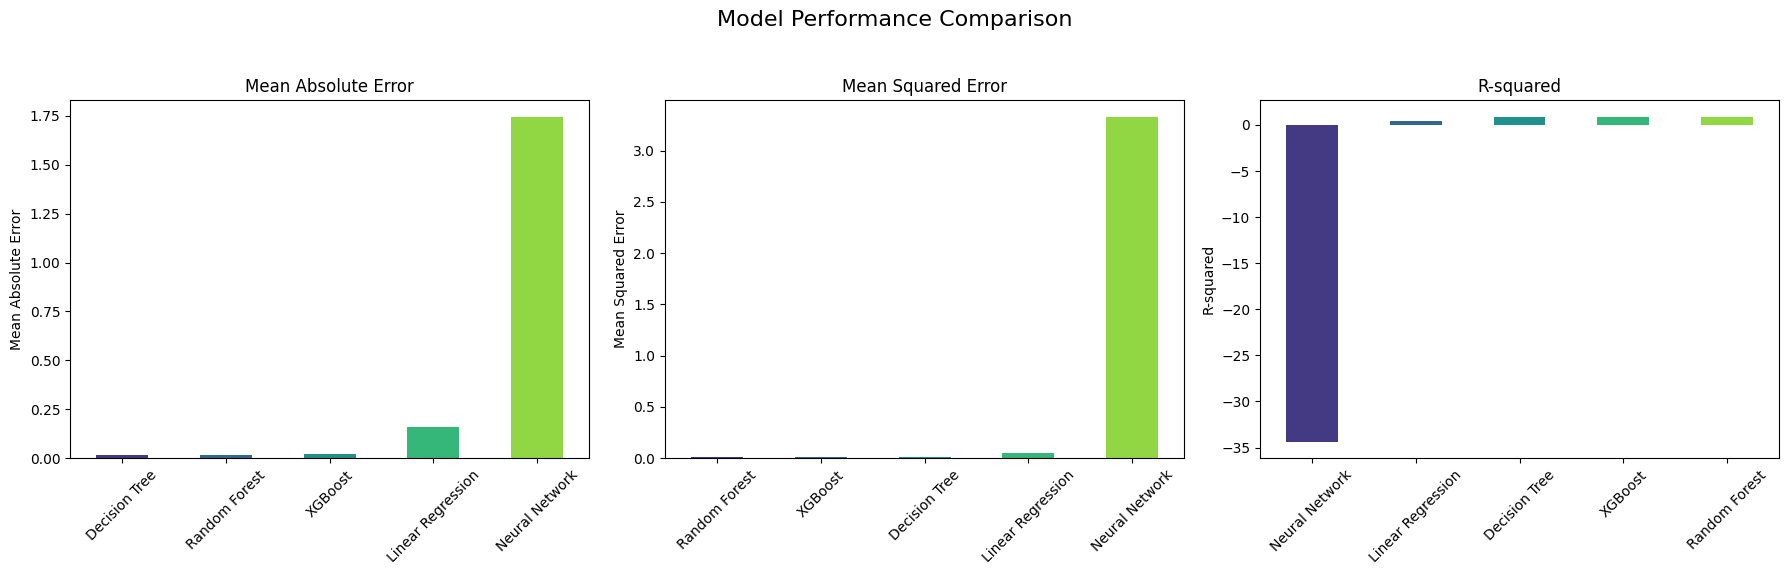

In [99]:


# Converting the results to a pandas DataFrame
results_df = pd.DataFrame(results)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(results_df.columns), figsize=(18, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

for i, metric in enumerate(results_df.columns):
    ax = axes[i]
    results_df[metric].sort_values().plot(kind='bar', ax=ax, color=sns.color_palette('viridis', len(results_df)))
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

## Model Performance Interpretation

Based on the evaluation metrics (Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared) and the generated plots:

* **Mean Absolute Error (MAE):** Represents the average magnitude of errors between predicted and actual values. Lower MAE indicates better model performance.
* **Mean Squared Error (MSE):** Represents the average of the squared errors. It penalizes larger errors more heavily than MAE. Lower MSE indicates better model performance.
* **R-squared:** Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared indicates a better fit of the model to the data. R-squared values can be negative when the model performs worse than simply predicting the mean of the target variable.

Looking at the results from the `results_df` DataFrame:

* **Linear Regression:** Has a MAE of 0.1605, MSE of 0.0545, and an R-squared of 0.4202.
* **Decision Tree:** Has a MAE of 0.0150, MSE of 0.0150, and an R-squared of 0.8404.
* **Random Forest:** Has a MAE of 0.0186, MSE of 0.0083, and an R-squared of 0.9114.
* **XGBoost:** Has a MAE of 0.0219, MSE of 0.0094, and an R-squared of 0.9004.
* **Neural Network:** Has a MAE of 1.7420, MSE of 3.3253, and an R-squared of -34.3854.

Based on these metrics, the **Random Forest** model appears to be the best performing model with the lowest Mean Squared Error and the highest R-squared value. The **Decision Tree** and **XGBoost** models also perform well, while the **Linear Regression** and **Neural Network** models show significantly worse performance.

The negative R-squared value for the Neural Network model indicates that it performs worse than simply predicting the mean of the target variable. This could be due to various reasons, such as the model architecture, hyperparameters, or the nature of the data.

Overall, the tree-based models (Decision Tree, Random Forest, and XGBoost) seem to be more suitable for this dataset and prediction task compared to Linear Regression and the current Neural Network configuration.